In [1]:
!pip install python-louvain

In [3]:
from community import community_louvain


In [7]:
import pandas as pd
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df_dolphin = pd.read_csv(
    "dolphin_edges.csv",
    sep=",",
    comment="#",
    header=None,
    names=["source", "target"]
)
dolphin = nx.from_pandas_edgelist(df_dolphin, "source", "target")

df_karate = pd.read_csv(
    "karate_edges.csv",
    sep=",",
    comment="#",
    header=None,
    names=["source", "target"]
)
karate = nx.from_pandas_edgelist(df_karate, "source", "target")

In [11]:
karate_com = community_louvain.best_partition(karate)
dolphin_com = community_louvain.best_partition(dolphin)

print(
    f"Karate Communities: {len(set(karate_com.values()))}\n"
    f"Dolphin Communities: {len(set(dolphin_com.values()))}"
)

Karate Communities: 4
Dolphin Communities: 6


In [13]:
comparison_data = {
    "Metric": ["Nodes", "Edges", "Density", "Diameter", "Average Degree", "Avg Clustering"],
    "Dolphin": [
        dolphin.number_of_nodes(),
        dolphin.number_of_edges(),
        nx.density(dolphin),
        nx.diameter(dolphin),
        sum(dict(dolphin.degree()).values()) / dolphin.number_of_nodes(),
        nx.average_clustering(dolphin)
    ],
    "Karate": [
        karate.number_of_nodes(),
        karate.number_of_edges(),
        nx.density(karate),
        nx.diameter(karate),
        sum(dict(karate.degree()).values()) / karate.number_of_nodes(),
        nx.average_clustering(karate)
    ]
}

df_compare = pd.DataFrame(comparison_data)
df_compare

,Metric,Dolphin,Karate
0,Nodes,62.000000,34.000000
1,Edges,159.000000,78.000000
2,Density,0.084082,0.139037
3,Diameter,8.000000,5.000000
4,Average Degree,5.129032,4.588235
5,Avg Clustering,0.258958,0.570638


In [17]:
import matplotlib.pyplot as plt
def compute_all_centralities(G):
    return {
        "Degree": nx.degree_centrality(G),
        "Betweenness": nx.betweenness_centrality(G),
        "Closeness": nx.closeness_centrality(G),
        "Eigenvector": nx.eigenvector_centrality(G, max_iter=500),
    }

karate_cent_all = compute_all_centralities(karate)
dolphin_cent_all = compute_all_centralities(dolphin)
def plot_top_centrality(centrality_dict, title, n=5):
    sorted_values = sorted(
        centrality_dict.items(), 
        key=lambda x: x[1], 
        reverse=True
    )[:n]

    labels = [str(x[0]) for x in sorted_values]
    values = [x[1] for x in sorted_values]

    plt.figure(figsize=(7,4))
    plt.bar(labels, values, color="skyblue")
    plt.title(title)
    plt.xlabel("Node")
    plt.ylabel("Centrality Score")
    plt.show()
    

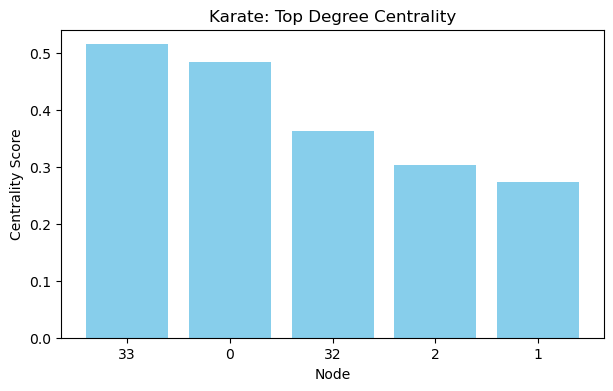

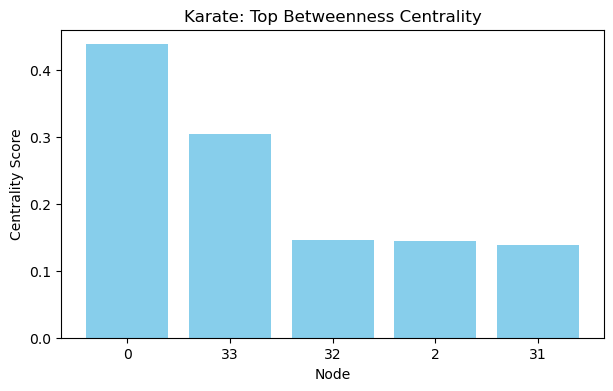

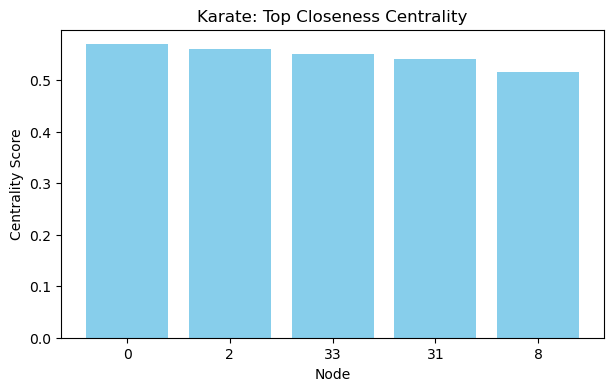

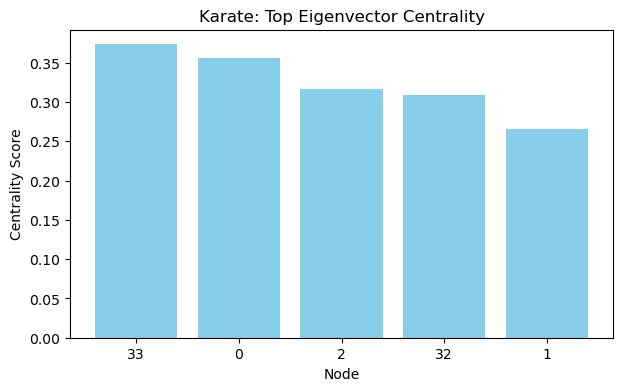

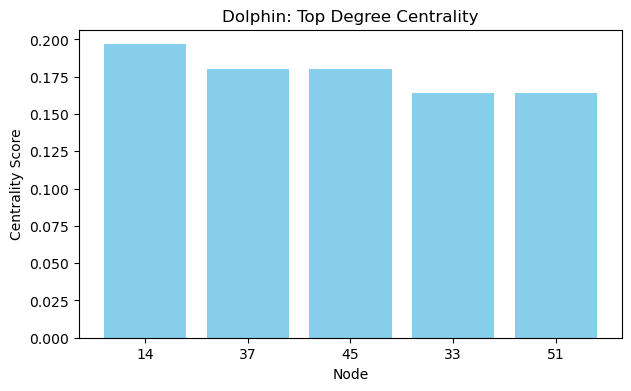

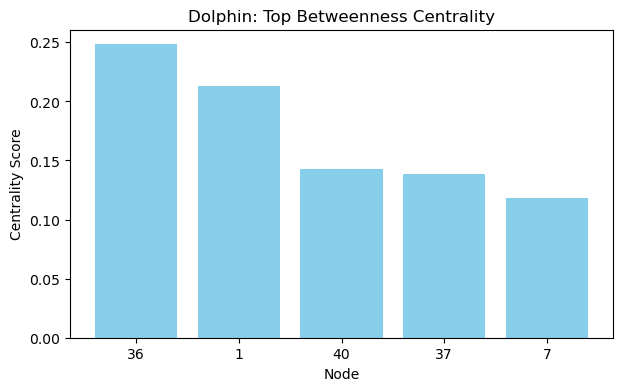

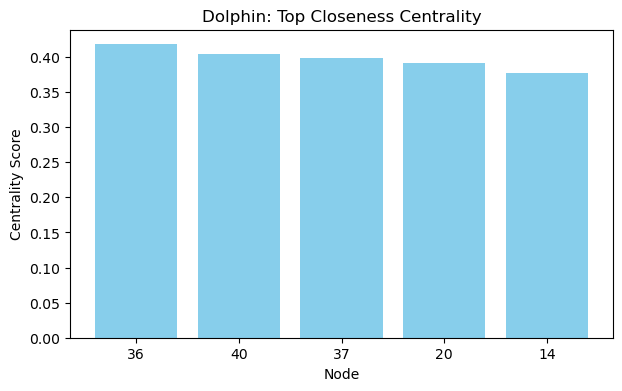

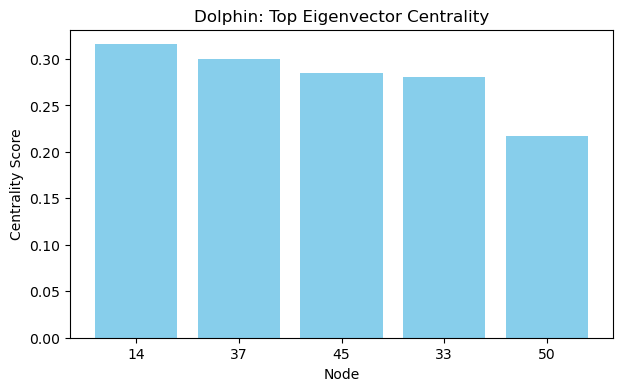

In [19]:
# Karate
plot_top_centrality(karate_cent_all["Degree"], "Karate: Top Degree Centrality")
plot_top_centrality(karate_cent_all["Betweenness"], "Karate: Top Betweenness Centrality")
plot_top_centrality(karate_cent_all["Closeness"], "Karate: Top Closeness Centrality")
plot_top_centrality(karate_cent_all["Eigenvector"], "Karate: Top Eigenvector Centrality")

# Dolphin
plot_top_centrality(dolphin_cent_all["Degree"], "Dolphin: Top Degree Centrality")
plot_top_centrality(dolphin_cent_all["Betweenness"], "Dolphin: Top Betweenness Centrality")
plot_top_centrality(dolphin_cent_all["Closeness"], "Dolphin: Top Closeness Centrality")
plot_top_centrality(dolphin_cent_all["Eigenvector"], "Dolphin: Top Eigenvector Centrality")

In [21]:
print("Karate Community Count:", len(set(karate_com.values())))
print("Dolphin Community Count:", len(set(dolphin_com.values())))

Karate Community Count: 4
Dolphin Community Count: 6


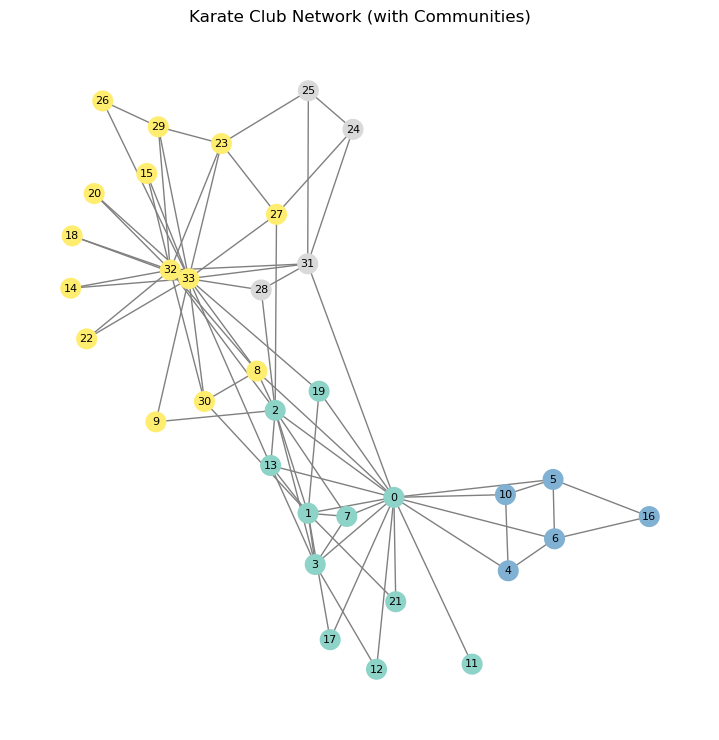

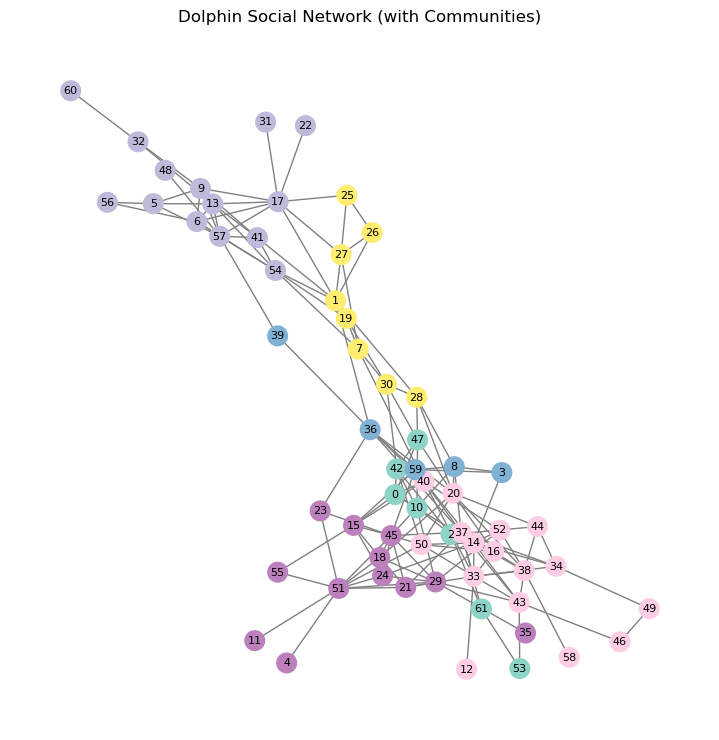

In [23]:
def draw_network(G, partition, title):
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(7, 7))

    nx.draw(
        G,
        pos,
        node_color=[partition[n] for n in G.nodes()],
        cmap=plt.cm.Set3,
        with_labels=True,
        node_size=200,
        font_size=8,
        edge_color="gray"
    )
    plt.title(title)
    plt.show()

draw_network(karate, karate_com, "Karate Club Network (with Communities)")
draw_network(dolphin, dolphin_com, "Dolphin Social Network (with Communities)")